In [63]:
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt 
from random import random
from random import gauss
INPUTS = 2
OUTPUTS = 3

INPUT = 0
OUTPUT = 1
HIDDEN = 2

# A global counter that keeps count of current innovation number, should go under population class
innovation_counter = 0



In [64]:
class Connection:
    def __init__(self, i, o, innovation_no, weight=1):
        self.i = i #input node class
        self.o = o #output node class
        self.weight = weight
        self.enabled = True
        self.innovation_no = innovation_no
    def mutate_weight(self):
        rand = random()
        if (rand < 0.1):
            self.weight = -1 + 2*random()
        else:
            self.weight += gauss(-0.02, 0.02)
        self.weight = np.clip(self.weight, -1, 1)
        

In [65]:
class Node:
    def __init__(self, no, _type):
        self.number = no
        self.type = _type #input is 0, output is 1, hidden is 2
        self.output = 0
        self.input_connections = []
    
    def ReLu(self,x):
        return np.maximum(0,x)
    
    def calc_output(self, source): # Recursive function for traversing through all inputs
        input_sum = 0
        if (source.type == INPUT):
            return source.output
        if (source.output != -1):
            return source.output
        for connection in source.input_connections:
            if connection.enabled:
                input_sum += source.calc_output(connection.i) * connection.weight
        source.output = self.ReLu(input_sum)
        return source.output


In [66]:
class Genome:
    def __init__(self, N_inputs, N_outputs): 
        self.N_inputs = N_inputs
        self.N_outputs = N_outputs

        global innovation_counter #should move this to use population class
        self.nodes = []
       
        #Add all input nodes
        for idx_input in range(N_inputs):
            self.nodes.append(Node(idx_input, INPUT))

        #Add all output nodes and fully connect to input nodes
        for idx_output in range(N_outputs):
            self.nodes.append(Node(N_inputs + idx_output, OUTPUT))
            for i in self.nodes[:N_inputs]:
                self.nodes[-1].input_connections.append(Connection(i, self.nodes[-1], innovation_counter))
                innovation_counter += 1
    
    # Add connection between two nodes
    def add_connection(self, node1_no, node2_no, weight=1):
        global innovation_counter
        node1 = self.nodes[node1_no]
        node2 = self.nodes[node2_no]
        # Check if connection has existed
        for connection in node2.input_connections:
            if (connection.i == node1):
                connection.enabled = True
                return
        # Else create new
        node2.input_connections.append(Connection(node1, node2, innovation_counter, weight))
        innovation_counter =+ 1
        # CHeck if connection has existed
        # !!! TODO
    
    # Disable a connection between two nodes
    def disable_connection(self, node1_no, node2_no):
        node1 = self.nodes[node1_no]
        node2 = self.nodes[node2_no]
        for i in node2.input_connections:
            if (i.i == node1):
                i.enabled = False

    # Add a new node between two nodes
    def add_node(self, node1_no, node2_no):
        self.nodes.append(Node(len(self.nodes),HIDDEN))
        new_node = self.nodes[-1]
        self.disable_connection(node1_no, node2_no)        
        self.add_connection(node1_no, new_node.number, weight=1)
        self.add_connection(new_node.number, node2_no, weight=0.5) # TODO weight mutation

    # Update weight of a connection between 2 nodes
    def update_weight(self, node1_no, node2_no, weight):
        node1 = self.nodes[node1_no]
        node2 = self.nodes[node2_no]       
        for i in node2.input_connections:
            if (i.i == node1):
                i.weight = weight

    # Calculate output of the net
    def feed_forward(self, input_data):
        # Zero all
        for node in self.nodes:
            node.output = -1
        # Renew the input nodes
        for i in range(0,self.N_inputs):
            self.nodes[i].output = input_data[i]
        
        # Calculate outputs
        output = []
        for i in range(self.N_inputs, self.N_inputs+self.N_outputs):
            output.append(self.nodes[i].calc_output(self.nodes[i]))

        return output

    # Visualize the topology
    def topology(self):
        G=nx.Graph()
        fixed_positions = {}
        for i in self.nodes:      
            if(i.type == INPUT):
                G.add_node(i.number)
                fixed_positions[i.number] = (0, self.N_inputs - i.number)
            elif (i.type == OUTPUT):
                G.add_node(i.number)
                fixed_positions[i.number] = (10, self.N_outputs - i.number + self.N_inputs)
            else:
                G.add_node(i.number)

            for j in i.input_connections:
                if j.enabled:
                    G.add_edge(j.i.number, j.o.number, weight=j.weight)
        color_map = []
        for node in G:
            if node < self.N_inputs:
                color_map.append('red')
            elif node < (self.N_inputs + self.N_outputs): 
                color_map.append('green')
            else:
                color_map.append('blue')

        fixed_nodes = fixed_positions.keys()
        pos = nx.spring_layout(G,pos=fixed_positions, fixed = fixed_nodes, weight=None, k = 0.02 )
        nx.draw(G,pos,with_labels=True, node_color=color_map)
        labels = nx.get_edge_attributes(G,'weight')
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    
    
    

In [67]:
class Player:
    def __init__():
        
        pass


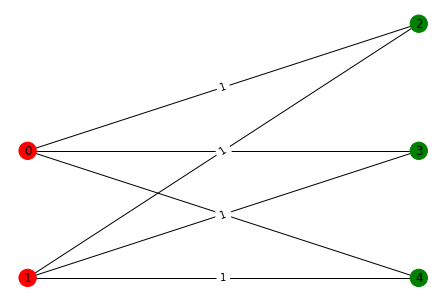

In [73]:
x = Genome(2,3)
x.topology()

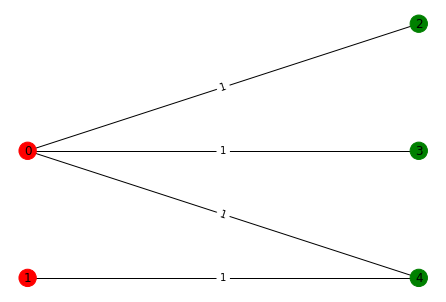

In [74]:
x.disable_connection(1,2)
x.disable_connection(1,3)
x.topology()

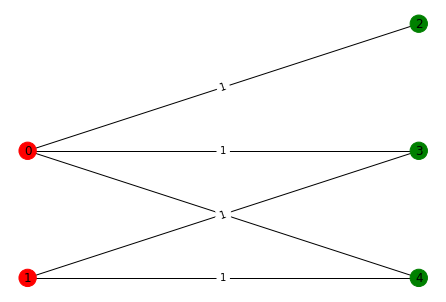

In [75]:
x.add_connection(1,3)
x.topology()

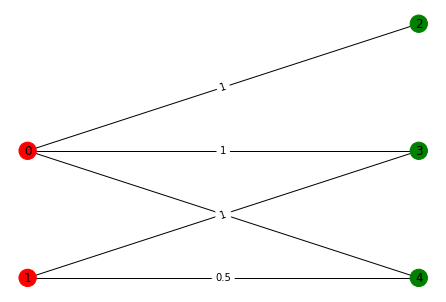

In [76]:
x.update_weight(1,4, 0.5)
x.topology()

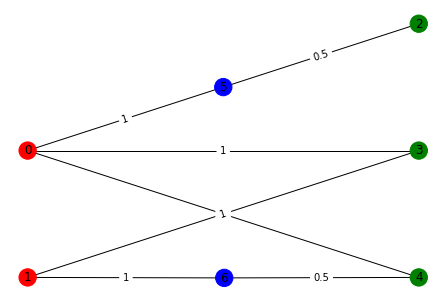

In [77]:
x.add_node(0,2)
x.add_node(1,4)
x.topology()

[1.0, 3, 2.5]


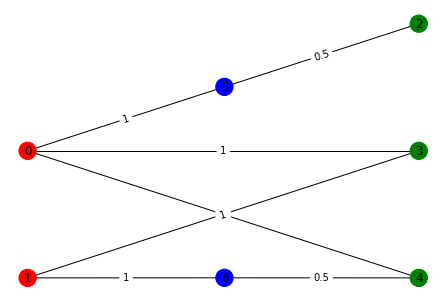

In [78]:
x.topology()
print(x.feed_forward([2,1]))